# Data Analysis
2023-March-03, NSYSU, Exp. course 

[lecture homepage](https://github.com/baobabyoo/Lecture_DataAnalysis)

## Importing packages

In [39]:
import os, sys, time

sys.path
sys.path.append('./')

import numpy as np
from scipy.optimize import curve_fit

import matplotlib
matplotlib.use('PDF')
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import time

## Defining functions

In [40]:
def myline(x, a, b):
    '''
    A function to return y = ax + b
    
    Input:
        x [double] : the x-axis coordinate 
        a [double] : slope of a 1st order polynomial
        b [double] : offset of a 1st order polynomial
        
    Return:
        y [double] : the y-axis value
    '''
    y = a * x + b
    
    return y

def gaussian_1d(x, amp, x0, sigma):
    '''
    Return a Gaussian distribution that is normalized to 1.0
             
    Input:
        x [double]       : offset
        amp [double]     : amplitude
        x0 [double]      : central position of the Gaussian
        sigma [double]   : standard deviation of the Gaussian
            
    Return:
        [double]   : A 1-dim Gaussian function
    '''
    
    A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
    
    xdiff = x - x0    
    B = -0.5 * (( xdiff/sigma )**2.0)

    return amp * A * np.exp(B)


## 1. Plotting (A look at 1D Gaussian random variable and uniform random variable)

### 1.1 Producing some data to plot

In [41]:
num_x = 300
x = np.arange(num_x)

mu     = 10.0
sigma  = 3.0
y_gaus = np.random.normal(loc=mu, scale=sigma, size=num_x)

low    = -8.0
high   = 2.0
y_unif = np.random.uniform(low=low, high=high, size=num_x)

### 1.2 Plotting data

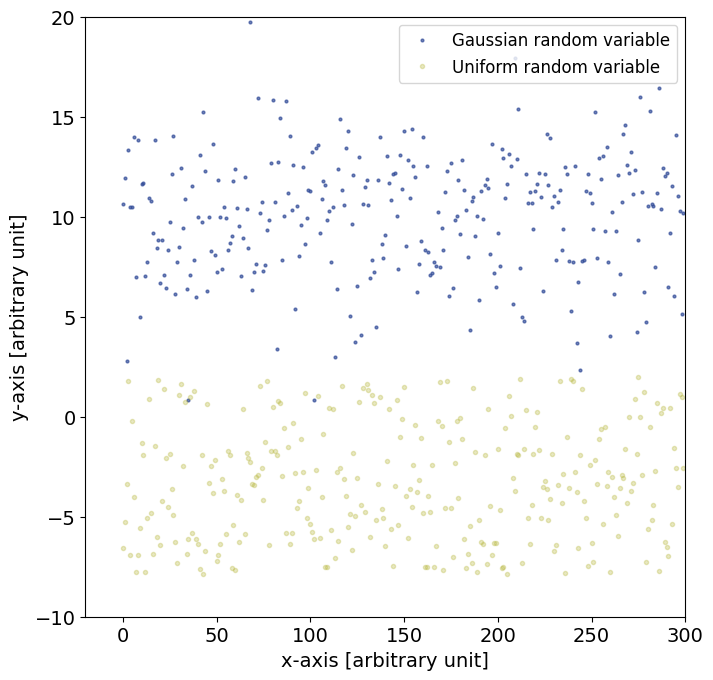

In [42]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

plt.plot(
    x,
    y_gaus,
    'o', # symbol shape
    color=(0.2,0.3,0.6, 0.7), # (R, G, B, transparency), ranged between [0, 1]
    markersize=2, 
    label = "Gaussian random variable"
        )

plt.plot(
    x,
    y_unif,
    'o', # symbol shape
    color=(0.7,0.7,0.2, 0.3), # (R, G, B, transparency), ranged between [0, 1]
    markersize=3, 
    label = "Uniform random variable"
        )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# Setting the plot range
plt.xlim( (-20, num_x) )
plt.ylim( (-10, 20) )

# PDF file output
plt.savefig('Gaussian_random_xy.pdf', 
            transparent = True
           )

### 1.3 plotting histogram

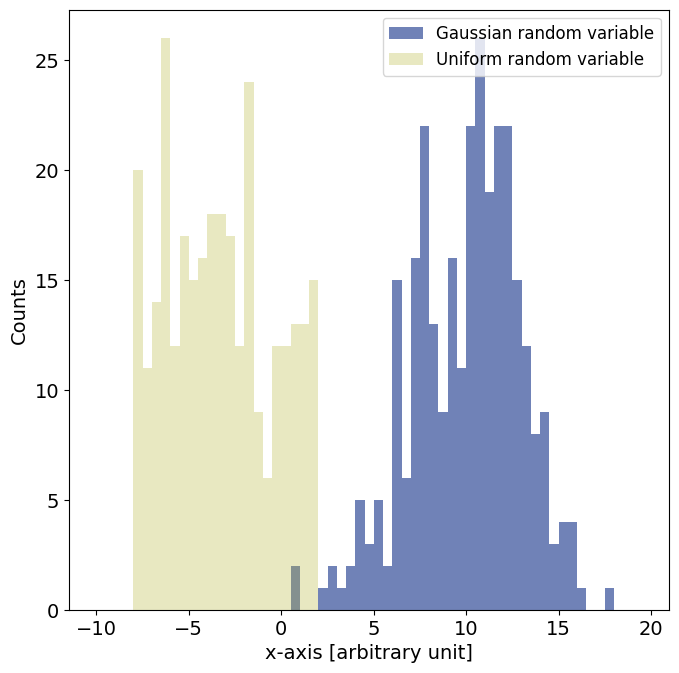

In [43]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('Counts', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

bins = np.arange(-10, 20, 0.5)


plt.hist(y_gaus, 
         bins=bins, color=(0.2,0.3,0.6, 0.7),
         label = "Gaussian random variable"
        )

plt.hist(y_unif, 
         bins=bins, color=(0.7,0.7,0.2, 0.3),
         label = "Uniform random variable"
        )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# PDF file output
plt.savefig('Gaussian_random_histogram.pdf', 
            transparent = True
           )

## 2. Data I/O

### 2.1 Generating data

In [44]:
num_x = num_x
low   = 0
high  = 100
x = np.random.uniform(low=low, high=high, size=num_x)

#a       = 10.0
#b       = 100.0
a_true  = 10.0
b_true  = 100.0
sigma_y = 30.0

y_err = np.random.normal(loc=0, scale=sigma_y, size=num_x)
y     = myline(x, a_true, b_true) + y_err
print(y)

[ 526.93161888  345.77280406  268.38861892  393.73997788  764.05093104
  577.03792702  292.605976    324.94059702  937.48770208 1121.12748542
  497.09998995  501.43248635  685.62595153  282.68431168  166.26087997
  154.98448536  614.81037276  498.79183008  619.3926188   378.48627621
  472.79369143 1047.31103062  597.79368508 1000.02826257  467.37907305
  509.4890351   307.5894593   961.63655824  607.26478322  958.13311721
  643.4002419   607.15256607  738.4878675   638.43689532  724.78130899
 1003.76537545  485.57785667 1083.18260169  538.99736967  474.0222362
  259.80990575  539.01258358  976.57794528  537.85395089  832.40976829
  220.21446734  897.00258809  760.79815845  435.77855628  546.03100969
  508.12777561 1050.96730841  563.57041565  408.83835354 1040.98662614
  116.88891858  251.14027092   95.8502514   524.34578951  692.73087653
 1005.40394787  775.78218686  168.15809806  266.15202527  490.25647422
  871.45770765  950.98123131 1007.95627251  895.46263038  952.13964315
 1050.6

### 2.2 Standard data output, and data input with numpy.loadtxt

#### 2.2.1 Standard file output

In [45]:
filename = 'data_1dpoly.txt'

# remove the file in case it exist
os.system('rm -rf '+ filename)

# open output file
f = open(filename, "w")

for i in range(0,num_x):
    out_string = str(x[i]) + ' ' + str(y[i]) + ' '  +  str(sigma_y) +'\n' # '\n is a line break'
    f.write(out_string)

# close output file
f.close()

#### 2.2.2 Read space-separated values using numpy.loadtxt method

In [46]:
x, y, y_err = np.loadtxt(filename, 
                  usecols=(0, 1, 2),
                  unpack = True
                 )
print ("##### Loaded x values")
print(x)
print(' ')
print ("##### Loaded y values")
print(y)
print(' ')
print ("##### Loaded y errors")
print(y_err)

##### Loaded x values
[39.77942555 27.15030217 16.70533851 24.27554041 70.75577893 49.22221408
 23.58351839 29.36818738 83.29529057 99.53333943 37.81278465 39.54269738
 56.98745921 10.79785395  3.34896964  8.7424518  50.54577162 37.73131028
 53.5533009  27.17981625 40.33254082 93.38193886 52.08052523 90.16451561
 39.4060619  41.4847155  18.86351229 92.06420731 53.28042367 85.27071162
 53.12495399 49.08343492 64.92266892 50.91209423 64.05633577 91.29477031
 37.75056305 92.96074623 43.74645959 38.58091314 14.74909669 44.92733322
 84.04270221 44.43269283 68.82372507 15.93709404 82.21835127 70.48557259
 31.78630556 44.44748498 38.5610018  94.37896763 42.80573147 27.32397177
 94.46630294  2.18310974 14.15548638  2.15953903 39.20677465 58.95792052
 85.5257879  68.95653409  7.35260828 14.11591548 41.58497586 78.70761658
 83.8693718  90.01192991 82.39876697 83.97557809 99.463797   60.42656612
 22.08422522 25.07637913 98.1163123  31.25869177 28.52008066 21.30487511
 69.0224721  86.00289305 98.6

### 2.3 Data I/O with pandas

#### 2.3.1 Creating a pandas dataframe and output to comma-separated-values files (csv files)

In [47]:
data = {'x': x,
        'y': y,
        'y_err': np.zeros(len(y)) + sigma_y
       }
df = pd.DataFrame(data)
print(df)

filename = 'data_1dpoly.csv'
os.system('rm -rf ' + filename)
df.to_csv(filename, index=False)

             x            y  y_err
0    39.779426   526.931619   30.0
1    27.150302   345.772804   30.0
2    16.705339   268.388619   30.0
3    24.275540   393.739978   30.0
4    70.755779   764.050931   30.0
..         ...          ...    ...
295  26.271975   375.273133   30.0
296  90.320777  1021.376077   30.0
297   0.827759   111.148944   30.0
298  97.033667  1018.997937   30.0
299  96.578366  1104.074551   30.0

[300 rows x 3 columns]


### 2.3.2 Reading back the csv file

In [48]:
path = './'
df_read = pd.read_csv(path + filename)

print(df_read)

             x            y  y_err
0    39.779426   526.931619   30.0
1    27.150302   345.772804   30.0
2    16.705339   268.388619   30.0
3    24.275540   393.739978   30.0
4    70.755779   764.050931   30.0
..         ...          ...    ...
295  26.271975   375.273133   30.0
296  90.320777  1021.376077   30.0
297   0.827759   111.148944   30.0
298  97.033667  1018.997937   30.0
299  96.578366  1104.074551   30.0

[300 rows x 3 columns]


In [49]:
# examining the read x-values and y-values
print(df_read.x)
print(' ')
print(df_read.y)

0      39.779426
1      27.150302
2      16.705339
3      24.275540
4      70.755779
         ...    
295    26.271975
296    90.320777
297     0.827759
298    97.033667
299    96.578366
Name: x, Length: 300, dtype: float64
 
0       526.931619
1       345.772804
2       268.388619
3       393.739978
4       764.050931
          ...     
295     375.273133
296    1021.376077
297     111.148944
298    1018.997937
299    1104.074551
Name: y, Length: 300, dtype: float64


#### 2.3.3 Plotting the loaded data

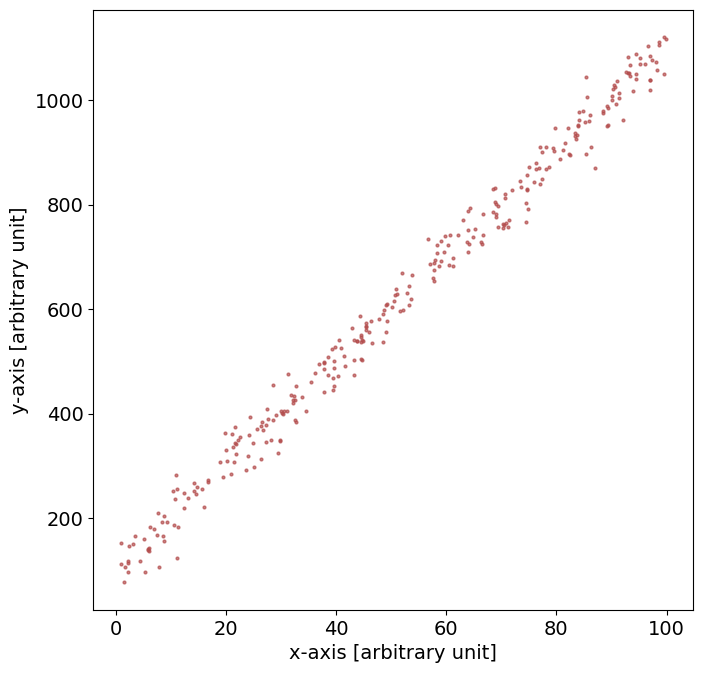

In [50]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

plt.plot(x, y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )




## 3. Data modeling

### Defining functions

In [51]:
def chisquare(y, y_err, ymodel):
    '''
    Return the chi-square given the measurements of y, y-error, and a model of the measurements y.
    
    Input:
        y [np array]      : measurements
        y_err [np array]  : measurement errors
        ymodel [np array] : a model of y 
    
    Return:
        chisquare [double] : the chi-square value
    
    '''
    
    return np.sum( ( (y - ymodel) / y_err)**2 )

### 3.1 A demonstration of the Metropolis-Hasting algorithm
Using a Mexican hat distribution function as an example

#### 3.1.1 Defining a Mexican hat

In [52]:
def mexhat(a):
    '''
    A Mexican hat function.
    
    Input:
      a [double]: the a variable.
      
    Return:
      probability [double]: probability
    '''
    
    if a >= 1.5:
        return 0.0
    elif a < -1.5:
        return 0.0
    elif ( 
             (a <= 1.5) and (a > 0.5)
            ):
        return 0.25
    elif ( 
             (a >= -1.5) and (a < -0.5)
            ):
        return 0.25
    elif ( 
             (a >= -0.5) and (a <= 0.5)
            ):
        return 0.5

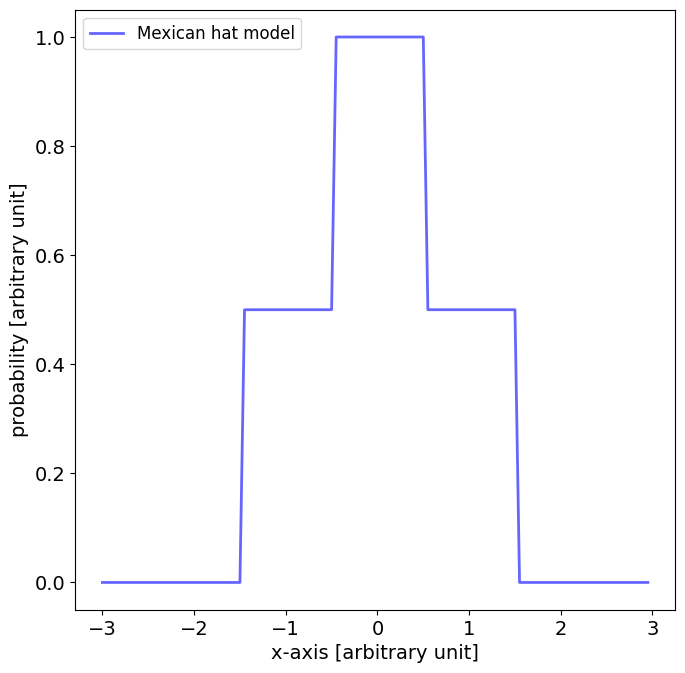

In [53]:
# plotting the mexican hat (normalizing peak to 1.0)

fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('probability [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels

a = np.arange(-3, 3, 0.05)
y = np.zeros(len(a))
for i in range(0, len(a)):
    y[i] = mexhat(a[i])

plt.plot(a, y/np.max(y), '-',
         color = (0.4, 0.4, 1, 1), linewidth = 2.0,
         label = 'Mexican hat model'
        )

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

#### 3.2.2 Defining proposal distribution, acceptance probability, and Metropolis-Hasting algorithm

In [54]:
def proposal_dis(a2, a1):
    '''
    Here I simply use an unnormalized flat distribution, i.e., given a1,
    the probability of making transition to any a2 is a constant. 
    Here just return 1.0 since the contribution in the dominator/numeritor will cancel.
    '''
    return 1.0

def acceptance_prob(a2, a1):
    '''
    Given the present a-value (a1) and the next a-vavlue (a2),
    evaluate the acceptance probability alpha and return it.
    
    Input:
        a1, a2 [double]: parameter values
        
    Return:
        acceptance probability
    '''
    numerator =  mexhat(a2) * proposal_dis(a1, a2)
    denominator = mexhat(a1)* proposal_dis(a2, a1)
    if denominator > 0:
        test  = ( mexhat(a2)*proposal_dis(a1, a2) ) / ( mexhat(a1)* proposal_dis(a2, a1))
        alpha = np.min([1, test])
    else:
        alpha = 1.0
    return alpha
    
def metropolis_hasting_flatproposal(a1):
    '''
    Metropolis-Hasting algorithm. Providing an input a-value,
    return the next a-value. Assuming that hte proposal distribution is flat.
    
    Input:
        a1 [double]: present parameter value
        
    Return:
        a2 [double]: next parameter value
    '''
    a2c   = np.random.uniform(low=-3.0, high=3.0, size=1)[0]
    alpha = acceptance_prob(a2c, a1)

    draw  = np.random.rand(1)[0]
    if draw <= alpha:
        return a2c
    else:
        return a1
    
    

#### 3.3.3 Testing out how it works

51


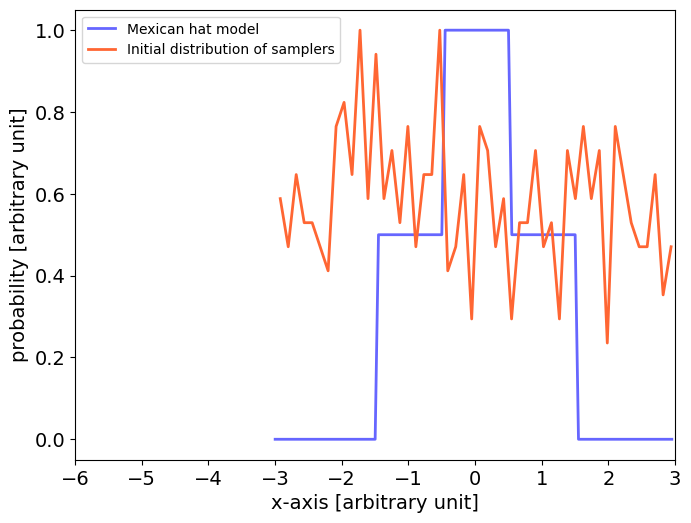

In [55]:
# initializing with 100 samplers, uniforming distributing between [-3, 3]
num_samplers = 500
samplers     = np.random.uniform(low=-3.0, high=3.0, size=num_samplers)
new_samplers = np.zeros(num_samplers)
all_samplers = samplers

# how many iterations to advance the samplers
num_itr = 0


# Initializing plots
fig = plt.figure(
                 figsize = (8, 6)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('probability [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels

# plotting the probability model
a = np.arange(-3, 3, 0.05)
y = np.zeros(len(a))
for i in range(0, len(a)):
    y[i] = mexhat(a[i])

plt.plot(a, y/np.max(y), '-',
         color = (0.4, 0.4, 1, 1), linewidth = 2.0,
         label = 'Mexican hat model'
        )

# producing histogram of the samplers
n_bin = 50
hist, bin_edges = np.histogram(all_samplers, bins=n_bin)
print(len(bin_edges))
bin_centers = np.zeros(n_bin)
for i in range(0, n_bin):
    bin_centers[i] = (bin_edges[i] + bin_edges[i+1])/2.0
    
# plotting a histogram of all samplers
plt.plot(bin_centers, hist/np.max(hist), '-',
         color = (1.0, 0.4, 0.2, 1), linewidth = 2.0,
         label = 'Initial distribution of samplers'
        )
    
# Setting the figure legend 
plt.xlim( (-6, 3) )
plt.legend(loc=2, fontsize=10)

51


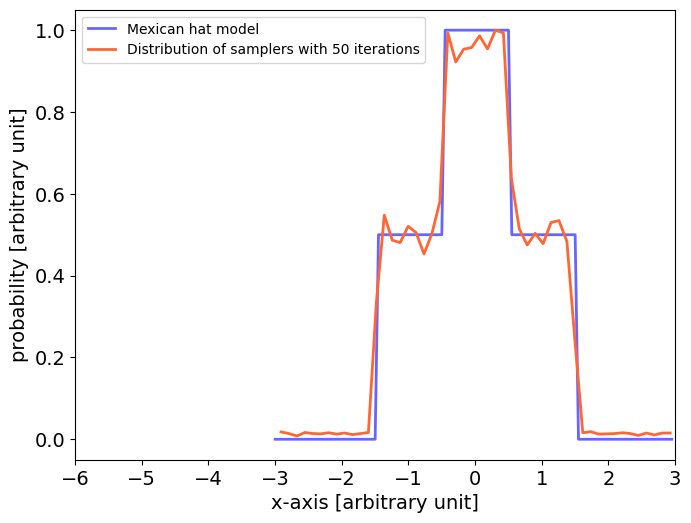

In [56]:
# initializing with 100 samplers, uniforming distributing between [-3, 3]
num_samplers = 500
samplers     = np.random.uniform(low=-3.0, high=3.0, size=num_samplers)
new_samplers = np.zeros(num_samplers)
all_samplers = samplers

# how many iterations to advance the samplers
num_itr = 50


# Initializing plots
fig = plt.figure(
                 figsize = (8, 6)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('probability [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels

# plotting the probability model
a = np.arange(-3, 3, 0.05)
y = np.zeros(len(a))
for i in range(0, len(a)):
    y[i] = mexhat(a[i])

plt.plot(a, y/np.max(y), '-',
         color = (0.4, 0.4, 1, 1), linewidth = 2.0,
         label = 'Mexican hat model'
        )

# Advancing samplers
for i in range(0, num_itr):
    for j in range(0, num_samplers):
        new_samplers[j] = metropolis_hasting_flatproposal( samplers[j] )
    all_samplers = np.append(all_samplers, new_samplers)
    samplers = new_samplers

# producing histogram of the samplers
n_bin = 50
hist, bin_edges = np.histogram(all_samplers, bins=n_bin)
print(len(bin_edges))
bin_centers = np.zeros(n_bin)
for i in range(0, n_bin):
    bin_centers[i] = (bin_edges[i] + bin_edges[i+1])/2.0
    
# plotting a histogram of all samplers
plt.plot(bin_centers, hist/np.max(hist), '-',
         color = (1.0, 0.4, 0.2, 1), linewidth = 2.0,
         label = 'Distribution of samplers with ' + str(num_itr) + ' iterations'
        )
    
# Setting the figure legend 
plt.xlim( (-6, 3) )
plt.legend(loc=2, fontsize=10)

51


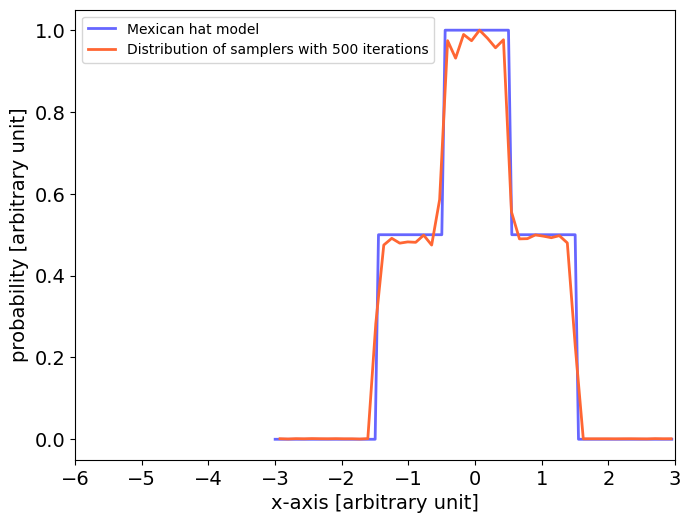

In [57]:
# initializing with 100 samplers, uniforming distributing between [-3, 3]
num_samplers = 500
samplers     = np.random.uniform(low=-3.0, high=3.0, size=num_samplers)
new_samplers = np.zeros(num_samplers)
all_samplers = samplers

# how many iterations to advance the samplers
num_itr = 500


# Initializing plots
fig = plt.figure(
                 figsize = (8, 6)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('probability [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels

# plotting the probability model
a = np.arange(-3, 3, 0.05)
y = np.zeros(len(a))
for i in range(0, len(a)):
    y[i] = mexhat(a[i])

plt.plot(a, y/np.max(y), '-',
         color = (0.4, 0.4, 1, 1), linewidth = 2.0,
         label = 'Mexican hat model'
        )

# Advancing samplers
for i in range(0, num_itr):
    for j in range(0, num_samplers):
        new_samplers[j] = metropolis_hasting_flatproposal( samplers[j] )
    all_samplers = np.append(all_samplers, new_samplers)
    samplers = new_samplers

# producing histogram of the samplers
n_bin = 50
hist, bin_edges = np.histogram(all_samplers, bins=n_bin)
print(len(bin_edges))
bin_centers = np.zeros(n_bin)
for i in range(0, n_bin):
    bin_centers[i] = (bin_edges[i] + bin_edges[i+1])/2.0
    
# plotting a histogram of all samplers
plt.plot(bin_centers, hist/np.max(hist), '-',
         color = (1.0, 0.4, 0.2, 1), linewidth = 2.0,
         label = 'Distribution of samplers with ' + str(num_itr) + ' iterations'
        )
    
# Setting the figure legend 
plt.xlim( (-6, 3) )
plt.legend(loc=2, fontsize=10)

51


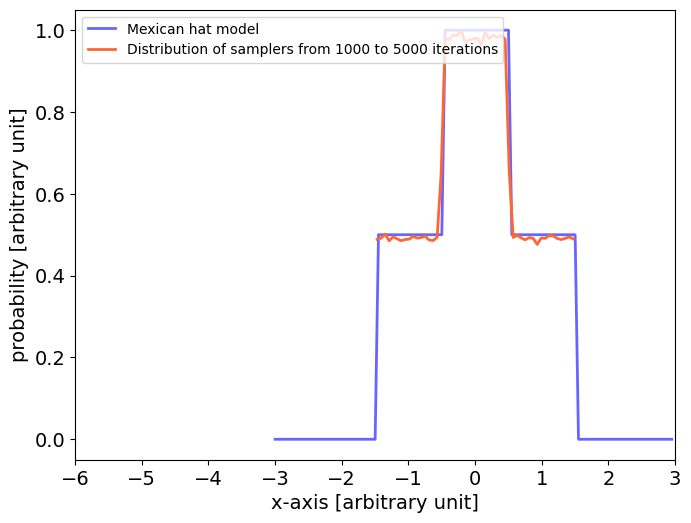

In [58]:
# initializing with 100 samplers, uniforming distributing between [-3, 3]
num_samplers = 500
samplers     = np.random.uniform(low=-3.0, high=3.0, size=num_samplers)
new_samplers = np.zeros(num_samplers)
all_samplers = np.zeros(num_samplers)

# how many iterations to advance the samplers
num_itr = 5000


# Initializing plots
fig = plt.figure(
                 figsize = (8, 6)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('probability [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels

# plotting the probability model
a = np.arange(-3, 3, 0.05)
y = np.zeros(len(a))
for i in range(0, len(a)):
    y[i] = mexhat(a[i])

plt.plot(a, y/np.max(y), '-',
         color = (0.4, 0.4, 1, 1), linewidth = 2.0,
         label = 'Mexican hat model'
        )

# Advancing samplers
for i in range(0, num_itr):
    for j in range(0, num_samplers):
        new_samplers[j] = metropolis_hasting_flatproposal( samplers[j] )
    if i == 1000:
        all_samplers = new_samplers
    elif i > 1000:
        all_samplers = np.append(all_samplers, new_samplers)
    samplers = new_samplers

# producing histogram of the samplers
n_bin = 50
hist, bin_edges = np.histogram(all_samplers, bins=n_bin)
print(len(bin_edges))
bin_centers = np.zeros(n_bin)
for i in range(0, n_bin):
    bin_centers[i] = (bin_edges[i] + bin_edges[i+1])/2.0
    
# plotting a histogram of all samplers
plt.plot(bin_centers, hist/np.max(hist), '-',
         color = (1.0, 0.4, 0.2, 1), linewidth = 2.0,
         label = 'Distribution of samplers from 1000 to 5000 iterations'
        )
    
# Setting the figure legend 
plt.xlim( (-6, 3) )
plt.legend(loc=2, fontsize=10)

### 3.2 MCMC fitting of the 1D polynomial model
y = ax + b

In [59]:
# importing the package for MCMC fittings
import emcee, corner

In [60]:
# allow using multiple processors
from multiprocessing import Pool
from multiprocessing import cpu_count

num_cpu = cpu_count()
print("You have {0} Processors".format(num_cpu))

You have 8 Processors


#### 3.2.1 Definining functions that are required in the MCMC model fittings

In [61]:
def log_prior(parms):
    '''
    Here is basically flat priors over the range [-1e10, 1e10] for both parameters.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        
    Return:
        prob [double] : logged "prior" probability
    '''
    a, b = parms
    if (-1e10 < a < 1e10) and \
       (-1e10 < b < 1e10):
        return 0.0
    
    return -np.inf


def log_likelihood(parms, x, y, y_err):
    '''
    This is the likelihood function.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        x [numpy array] : x-coordinate values
        y [numpy array] : y-coordinate values
        yerr [numpy array] : standard measurement errors of y
    '''
    a, b  = parms
    ymodel = myline(x, a, b)
    
    ln_likelihood = -0.5 * chisquare(y, y_err, ymodel)
    
    return ln_likelihood


def log_probability(parms, x, y, yerr):
    '''
    This is the log probability function.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        x [numpy array] : x-coordinate values
        y [numpy array] : y-coordinate values
        yerr [numpy array] : standard measurement errors of y
    '''
    
    lp = log_prior(parms)
    if not np.isfinite(lp):
        return -np.inf
    
    return lp + log_likelihood(parms, x, y, yerr)

#### 3.2.2 Doing the MCMC fittings
check [this page](https://emcee.readthedocs.io/en/stable/tutorials/parallel/) for how to parallelize this part.

In [62]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

# model setup
init_parms   = np.array( [999.0, 999.0] )
ndim         = len(init_parms)

# MCMC setup
nwalkers        = 100  # number of walkers, which need to be a few times larger than the number of free-parameters
nsteps          = 5000 # number of steps
step_to_discard = 100  # number of steps to be discarded

# initialize walkers at different positions (i.e., initial parameters)
pos = init_parms + np.random.randn(nwalkers, ndim ) * 300

# timing the code
start_time = time.time()

# running MCMC with a single CPU processor

# initializing the emcee samplers
sampler = emcee.EnsembleSampler(
                                nwalkers, ndim, log_probability, 
                                args=(df_read.x, df_read.y, df_read.y_err)
                                )


# advancing the emcee samplers
sampler.run_mcmc(
                 pos, nsteps, progress = True
                )

# timing the code
end_time = time.time()
print("Time taken:", end_time - start_time)

100%|██████████████████████████████████████████████████| 5000/5000 [03:15<00:00, 25.63it/s]

Time taken: 195.13102197647095


#### 3.2.3 Plotting saplers

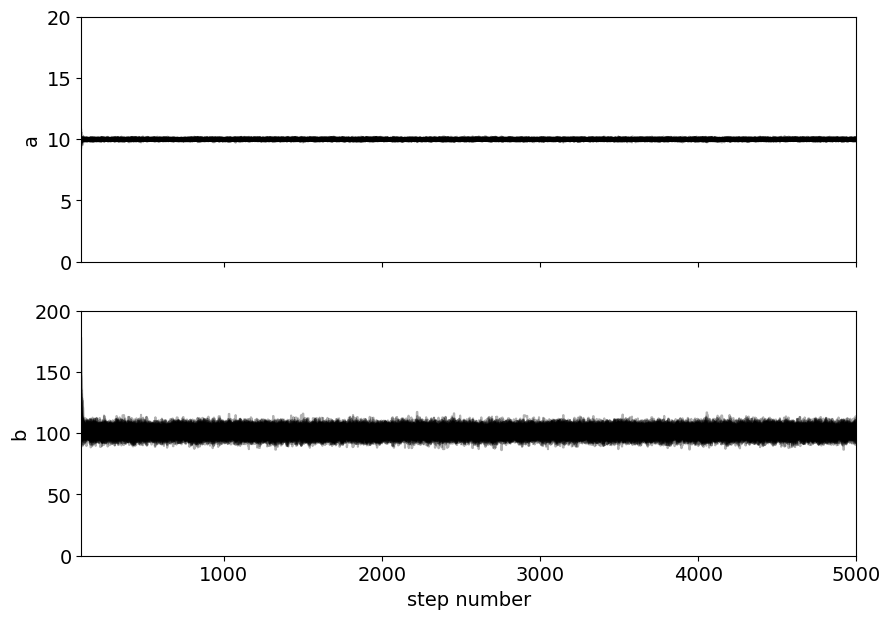

In [63]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)

samples = sampler.get_chain()
num_samples = len(samples)

labels = ["a", "b"]

for i in range(ndim):
    ax = axes[i]
    ax.plot(
            samples[:, :, i], 
            "k", 
            alpha=0.3
           )
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])

axes[-1].set_xlabel("step number");

# Setting plotting ranges
ax.set_xlim(step_to_discard, num_samples)
axes[0].set_ylim(0, 20)
axes[1].set_ylim(0, 200)

# PDF file output
plt.savefig('emcee_modeldata_1dpoly.pdf', 
            transparent = True
           )

#### 3.2.4 Making corner plot

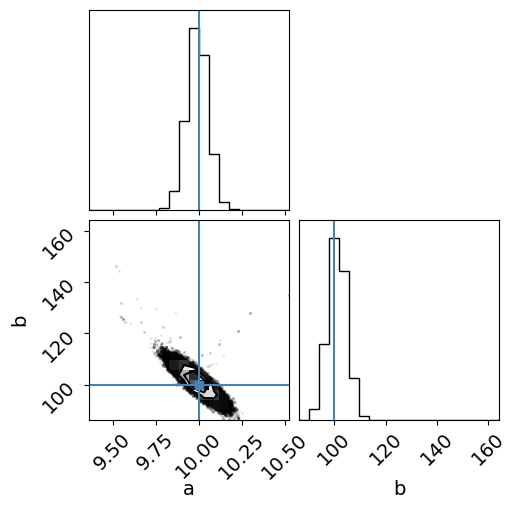

In [64]:
import corner

flat_samples = sampler.get_chain(
                                 discard = step_to_discard, 
                                 #thin = 15, 
                                 flat = True
                                )


fig = corner.corner(
                    flat_samples, labels = labels, truths=[a_true, b_true]
                   )

# PDF file output
plt.savefig('emcee_corner_1dpoly.pdf', 
            transparent = True
           )

#### 3.2.5 Summarizing the results of MCMC fittings

In [65]:
mcmc_a = np.percentile(flat_samples[:, 0], [16, 50, 84])
q      = np.diff(mcmc_a)
print('a value is: ' + str(round(mcmc_a[1],2) ) + '-' + str(round(q[0],2) ) +  '/+' + str( round(q[1], 2) ))

mcmc_b = np.percentile(flat_samples[:, 1], [16, 50, 84])
q      = np.diff(mcmc_b)
print('b value is: ' + str(round(mcmc_b[1],2) ) + '-' + str(round(q[0],2) ) +  '/+' + str( round(q[1], 2) ))

a value is: 9.99-0.06/+0.06
b value is: 101.05-3.55/+3.57


#### 3.2.6 Plotting the MCMC fitting results

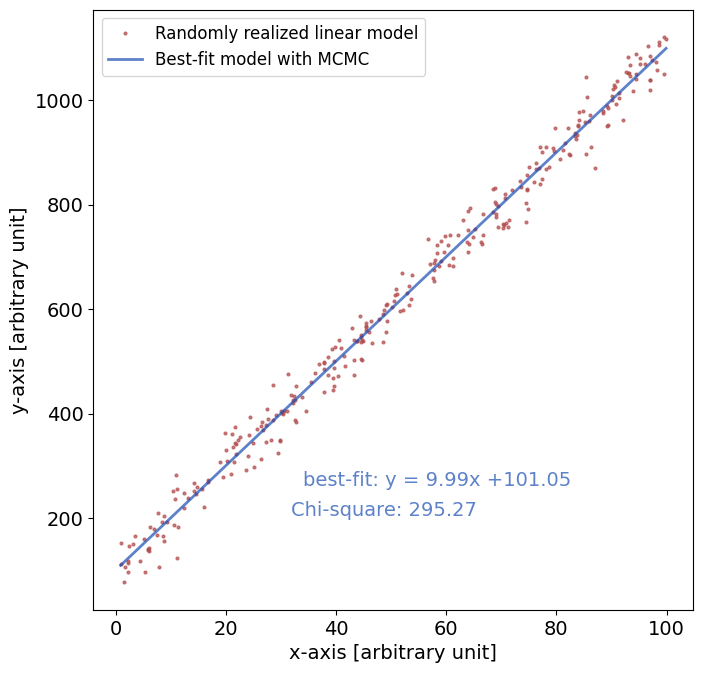

In [66]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

# label chi-square
chi2 = chisquare(df_read.y, df_read.y_err, myline(df_read.x, mcmc_a[1], mcmc_b[1] ) )
label_string = 'Chi-square: ' + str( round(chi2, 2) )
plt.text(0.33, 0.15, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

# plot data
plt.plot(df_read.x, df_read.y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

# plot model
x_sort = np.sort(df_read.x)
plt.plot(x_sort, myline(x_sort, mcmc_a[1], mcmc_b[1]),
         '-', linewidth = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model with MCMC"
        )

# text labeling
label_string = 'best-fit: y = ' + str( round(mcmc_a[1], 2) ) + 'x' + \
                              ' +' + str( round(mcmc_b[1], 2) )
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('MCMC_modeldata_1dpoly.pdf', 
            transparent = True
           )

#### 3.2.7 Using Multi-Processor
This is a bad example since the evaluation of the probability functions is too simple.
Therefore, the data transfer becomes the bottleneck, making the multi-processing calculation taking longer time than the single-processor calculation. But You can take this part as an example of how to setup the codes.

In [67]:
# importing the module that defines the log probability and likelihood
import lecture_module

In [68]:
# If you are using Macbook Pro, the following import is necessary
# and we must use the HDF backend
from emcee.backends import HDFBackend

n_cpu = cpu_count()
print("You have {0} CPUs processors".format(n_cpu))

You have 8 CPUs processors


In [69]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

# model setup
init_parms   = np.array( [999.0, 999.0] )
ndim         = len(init_parms)

# MCMC setup
nwalkers        = 100   # number of walkers, which need to be a few times larger than the number of free-parameters
nsteps          = 5000  # number of steps
step_to_discard = 100   # number of steps to be discarded
n_processor     = 7     # number of CPU processors to use

# initialize walkers at different positions (i.e., initial parameters)
pos = init_parms + np.random.randn(nwalkers, ndim ) * 300

# timing the code
start_time = time.time()

# running MCMC with multi-processor
if n_processor < n_cpu:
    # initializing the emcee samplers
    backend_name = 'backend.h5'
    os.system('rm -rf ' + backend_name)
    mcmcbackend = HDFBackend(filename = backend_name)
    pool = Pool(processes = n_processor)
    sampler = emcee.EnsembleSampler(
                                    nwalkers, ndim, lecture_module.log_probability, 
                                    args    = (df_read.x, df_read.y, df_read.y_err),
                                    backend = mcmcbackend,
                                    pool    = pool      # Multi-processor (does not work for Macbook Pro)
                                   )
    # advancing the emcee samplers
    sampler.run_mcmc(
                     pos, nsteps, progress = True
                    )
else:
    print('Dumb axx, you got a bug with Pool setting.')

# timing the code
end_time = time.time()
print("Time taken:", end_time - start_time)


100%|██████████████████████████████████████████████████| 5000/5000 [02:15<00:00, 36.77it/s]

Time taken: 137.5376877784729
